# Data Visualization to Accompany Regression Data

This notebook is meant to serve as a companion to the notebook on regression anaylsis of hurricane cost and features. My initial fit using all of the feature was pretty poor, and I'm using this notebook to explore trends in the data that can give insight on how to improve the regression.

In [2]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
path = './'
file = 'storms_merged.pkl'
data = pd.read_pickle(path+file)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 727
Data columns (total 23 columns):
damage_USD        728 non-null float64
name              728 non-null object
stormID           728 non-null object
areas_affected    728 non-null object
dates_active      728 non-null object
max_storm_cat     728 non-null int64
deaths            728 non-null int64
year              728 non-null object
duration          728 non-null float64
lat_delta         728 non-null float64
lon_delta         728 non-null float64
wind_v_max        728 non-null float64
wind_v_med        728 non-null float64
p_min             728 non-null float64
p_med             622 non-null float64
34kt_r_max        230 non-null float64
34kt_r_med        230 non-null float64
50kt_r_max        230 non-null float64
50kt_r_med        230 non-null float64
64kt_r_max        230 non-null float64
64kt_r_med        230 non-null float64
damage_imputed    728 non-null int64
landfall          728 non-null int64
dtypes: flo

I'm interested first, for the sake of this project, in looking at what features correlate for the whole dataset.

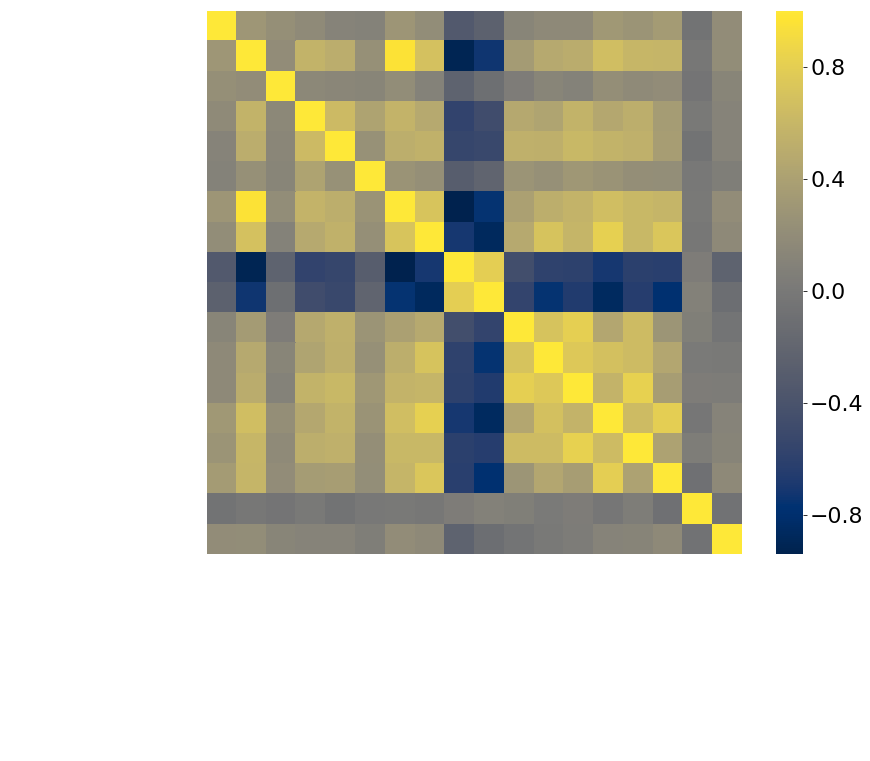

In [67]:
plt.figure(figsize=[12,10])
sns.heatmap(data.corr(), cmap = 'cividis');
plt.axis('off');
plt.savefig('./project_images/featureHeatmap.png')

It's troubling to see the lack of correlation with storm damage. Let's isolate those values.

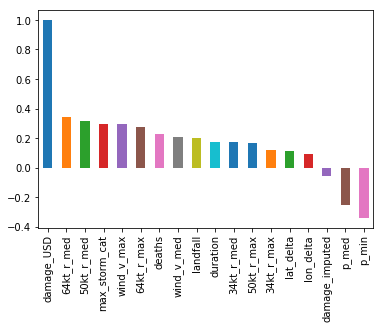

In [29]:
data.corr()['damage_USD'].sort_values(ascending = False).plot.bar()

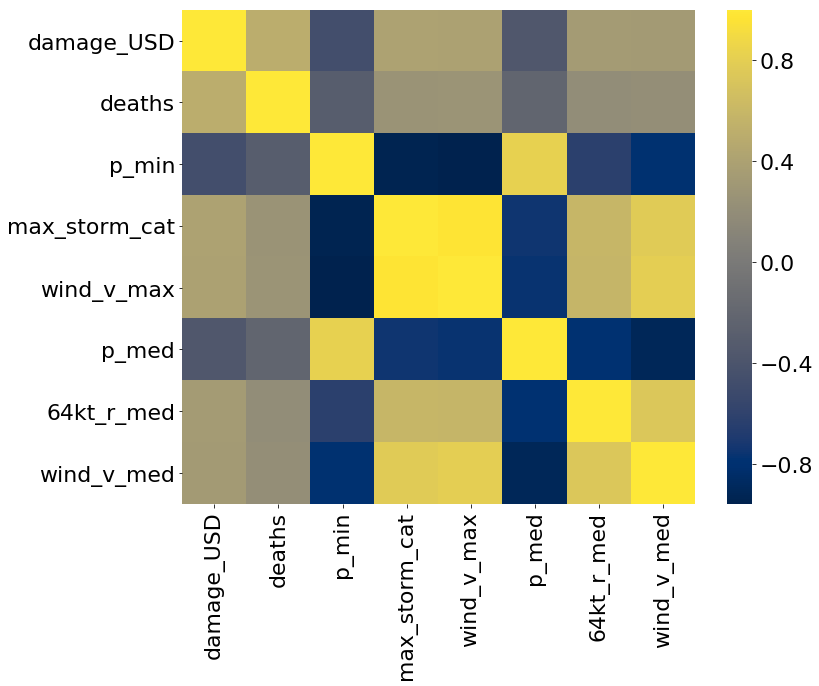

In [73]:
# Looking at features that correlate when we drop all rows with Nan Values
# Isolating storms that have wind-radius data and effect
hur_wind = data.dropna().reset_index(drop=True).select_dtypes(exclude = ['object'])
#hur_wind.info()
#hur_wind.corr()['damage_USD'].sort_values(ascending = False)

# Get 6 strongest correlations
strong_corrs = hur_wind.corr()['damage_USD'].apply(abs)\
    .sort_values(ascending = False).index[:8]


plt.figure(figsize=[12,10])
sns.heatmap(hur_wind[strong_corrs].corr(), cmap = 'cividis');
#plt.axis('off');
plt.tight_layout()
plt.savefig('./project_images/featureHeatmapNoNan.png')

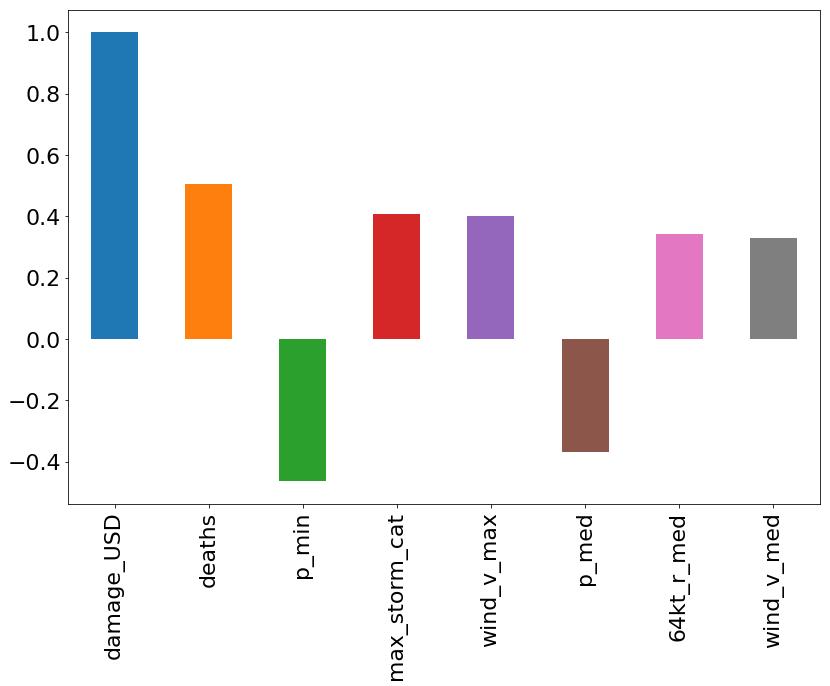

In [72]:

plt.figure(figsize=[12,10])
hur_wind[strong_corrs].corr()['damage_USD'].plot.bar()
#sns.heatmap(hur_wind[strong_corrs].corr(), cmap = 'cividis');
#plt.axis('off');
plt.tight_layout()
plt.savefig('./project_images/featureBarNoNan.png')

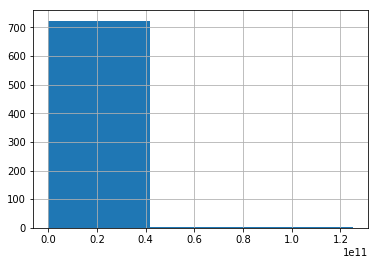

In [30]:
data.damage_USD.hist(bins=3)

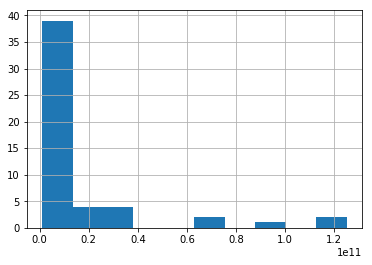

In [31]:
cutoff = 1e9
data[data.damage_USD>cutoff].damage_USD.hist()

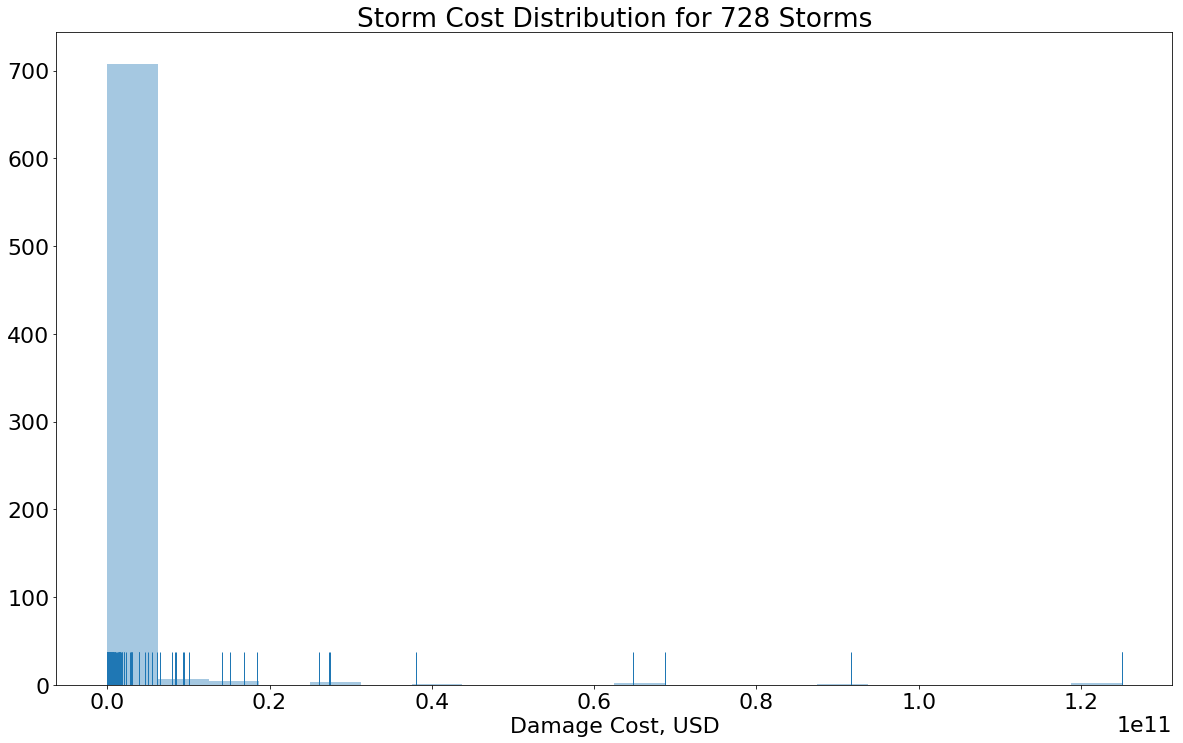

In [57]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = [20,12])
sns.distplot(data.damage_USD, bins=20, kde=False, rug=True);
plt.title('Storm Cost Distribution for {} Storms'.format(data.shape[0]))
plt.xlabel('Damage Cost, USD')
plt.savefig('./project_images/StormsDistribution.png')

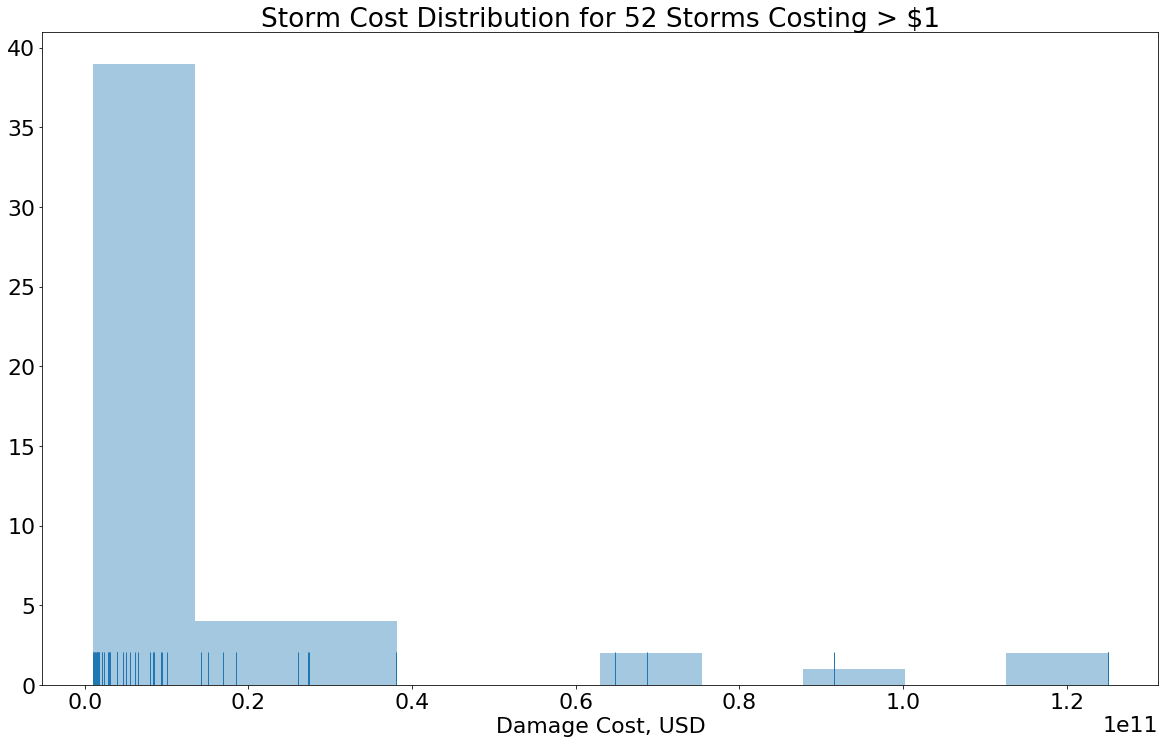

In [60]:
vals = data[data.damage_USD>1e9].damage_USD
plt.figure(figsize = [20,12])
sns.distplot(vals,bins = 10, kde=False, rug=True);
plt.title('Storm Cost Distribution for {} Storms Costing > $1'.format(vals.shape[0]))
plt.xlabel('Damage Cost, USD')
plt.savefig('./project_images/StormsDistributionOver1B.png')

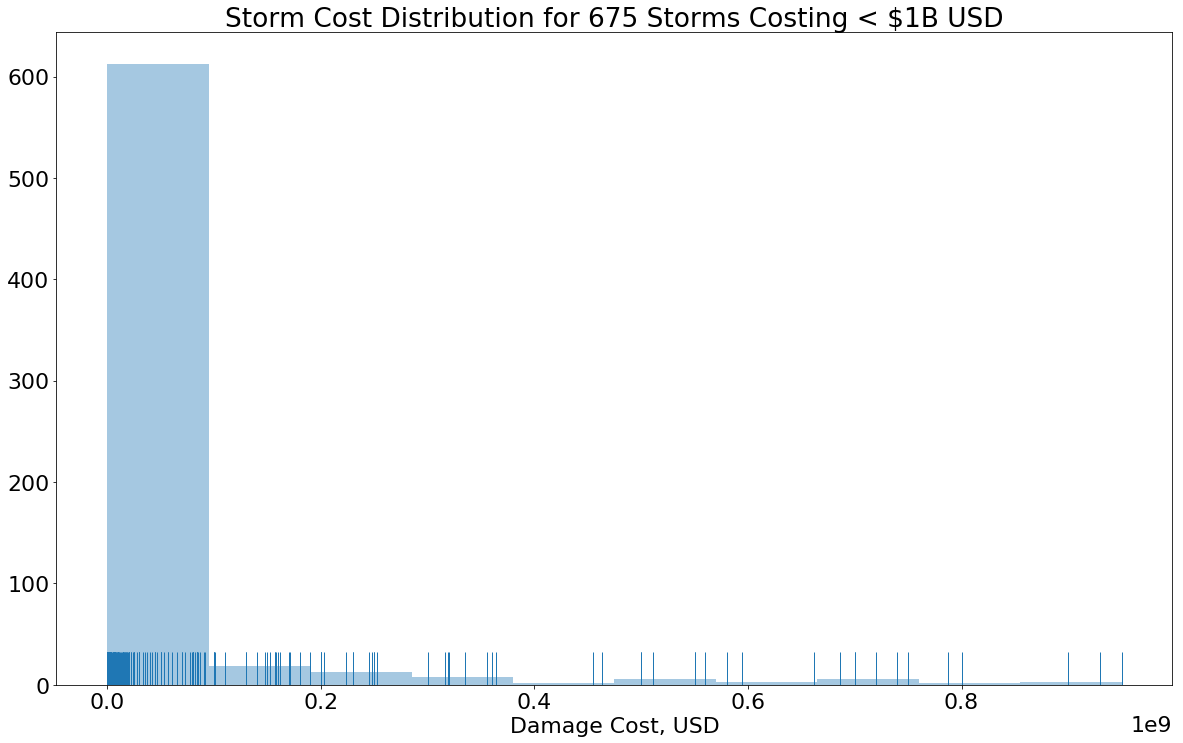

In [59]:
vals = data[data.damage_USD<1e9].damage_USD
plt.figure(figsize = [20,12])
sns.distplot(vals,bins = 10, kde=False, rug=True);
plt.title('Storm Cost Distribution for {} Storms Costing < $1B USD'.format(vals.shape[0]))
plt.xlabel('Damage Cost, USD')
plt.savefig('./project_images/StormsDistributionUnder1B.png')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


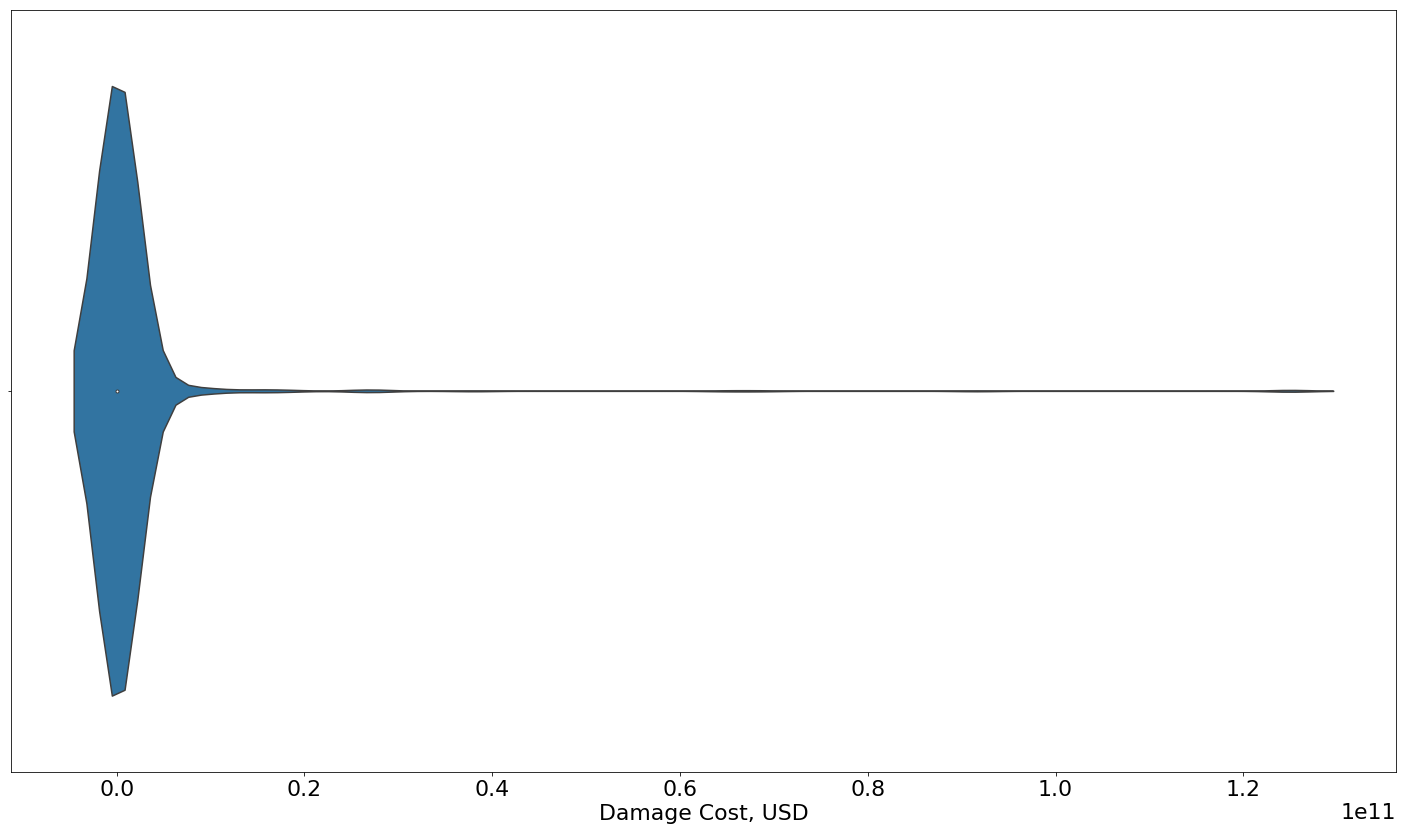

In [66]:
plt.figure(figsize=[20,12])
sns.violinplot(x=data.damage_USD)
plt.xlabel('Damage Cost, USD')
plt.tight_layout()
plt.savefig('./project_images/StormsDistributionViolin.png')

In [34]:
# Let's take a look at the 10 costliest storms
data[data.damage_USD>1e9].sort_values(by='damage_USD', ascending=False).head()

,damage_USD,name,stormID,areas_affected,dates_active,max_storm_cat,deaths,year,duration,lat_delta,...,p_min,p_med,34kt_r_max,34kt_r_med,50kt_r_max,50kt_r_med,64kt_r_max,64kt_r_med,damage_imputed,landfall
7,1.250000e+11,HARVEY,AL092017,"Barbados, Suriname, Guyana, Windward Islands, ...",August 17 – September 1,5,107,2017,17.25,24.5,...,937.0,1003.0,150.0,11.25,60.0,0.00,35.0,0.000,0,1
195,1.250000e+11,KATRINA,AL122005,"Bahamas, South Florida, Cuba, Southeastern US,...",August 23 – 30,6,1836,2005,7.50,17.0,...,902.0,978.5,200.0,62.50,120.0,37.50,90.0,10.000,0,1
12,9.160600e+10,MARIA,AL152017,"Lesser Antilles (British Virgin Islands, Domin...",September 16 – 30,6,3057,2017,16.00,35.8,...,908.0,968.5,220.0,140.00,120.0,73.75,90.0,24.375,0,1
86,6.870000e+10,SANDY,AL182012,"Greater Antilles (Jamaica, Cuba), The Bahamas,...",October 22 – October 29,4,286,2012,9.75,27.2,...,940.0,968.0,530.0,197.50,260.0,42.50,180.0,0.000,0,1
8,6.476000e+10,IRMA,AL112017,"Cape Verde, Leeward Islands (Barbuda, Saint Ma...",August 30 – September 12,6,134,2017,14.50,20.7,...,914.0,944.5,360.0,115.00,140.0,57.50,70.0,28.750,0,1


In [ ]:
# Do the above, but for what I analyzed in my dataset
no_effect = (hur_cost.areas_affected == 'None')